# Import library

In [1]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
seed =45
% matplotlib inline
plt.style.use('fivethirtyeight')

# Import data set

In [2]:
path = '../input/'
#path = ''
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
print('Number rows and columns:',train.shape)
print('Number rows and columns:',test.shape)

Number rows and columns: (891, 12)
Number rows and columns: (418, 11)


# Explore data set

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dependent varaiable

0    549
1    342
Name: Survived, dtype: int64

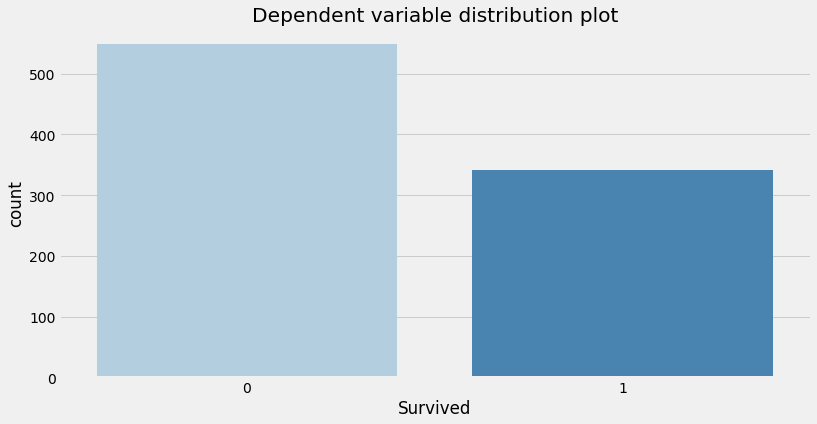

In [4]:
plt.figure(figsize=(12,6))
sns.countplot(train['Survived'],palette='Blues')
plt.title('Dependent variable distribution plot')
plt.xlabel('Survived')

train['Survived'].value_counts()

The 'target' variable is balanced 

# CORELATION PLOT

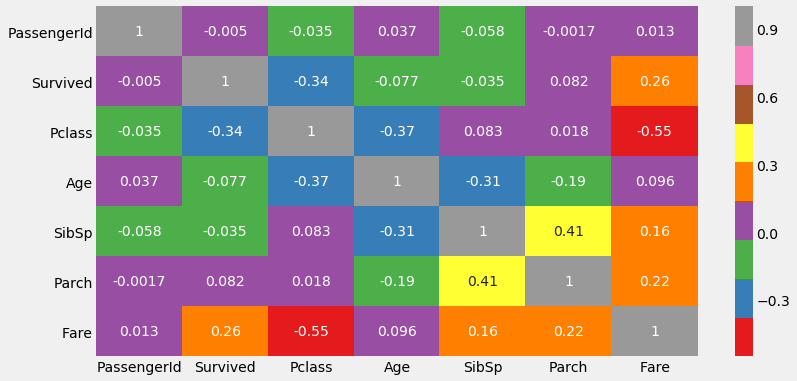

In [5]:
cor = train.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Set1',annot=True)

# Missing value is data set

In [6]:
k= pd.DataFrame()
k['train']= train.isnull().sum()
k['test'] = test.isnull().sum()
k.T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
train,0.0,0.0,0.0,0.0,0.0,177.0,0.0,0.0,0.0,0.0,687.0,2.0
test,0.0,NaN,0.0,0.0,0.0,86.0,0.0,0.0,0.0,1.0,327.0,0.0


Missing value in test train data set are in same propotion and same column

In [7]:
def missing_value(df):
    col = df.columns
    for i in col:
        if df[i].isnull().sum()>0:
            df[i].fillna(df[i].mode()[0],inplace=True)

In [8]:
missing_value(train)
missing_value(test)

In [9]:
def uniq(df):
    col = df.columns
    k = pd.DataFrame(index=col)
    for i in col:
        k['No of Unique'] = df[i].nunique()
        k['first Unique values'] = df[i].unique()[0]
        k['sencond Unique values'] = df[i].unique()[1]
        return k.T
uniq(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
No of Unique,891,891,891,891,891,891,891,891,891,891,891,891
first Unique values,1,1,1,1,1,1,1,1,1,1,1,1
sencond Unique values,2,2,2,2,2,2,2,2,2,2,2,2


In [10]:
def category_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=7:
            df[i] = df[i].astype('category')
category_type(train)
category_type(test)

# Univariate analysis

In [11]:
train.select_dtypes(include=['category']).head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


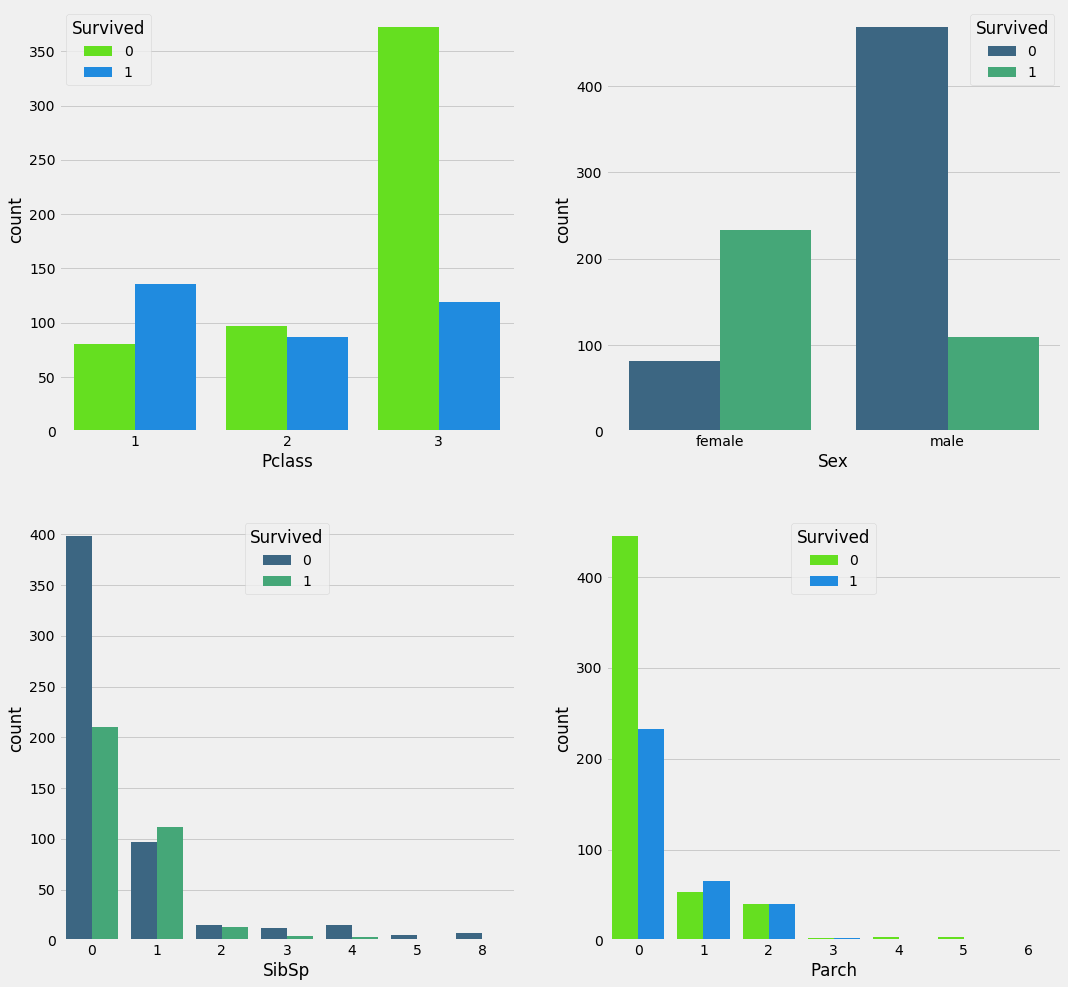

In [12]:
fig ,ax = plt.subplots(2,2,figsize=(16,16))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=train,x='Pclass',hue='Survived',palette='gist_rainbow',ax=ax1)
sns.countplot(data=train,x='Sex',hue='Survived',palette='viridis',ax=ax2)
sns.countplot(data=train,x='SibSp',hue='Survived',palette='viridis',ax=ax3)
sns.countplot(data=train,x='Parch',hue='Survived',palette='gist_rainbow',ax=ax4)

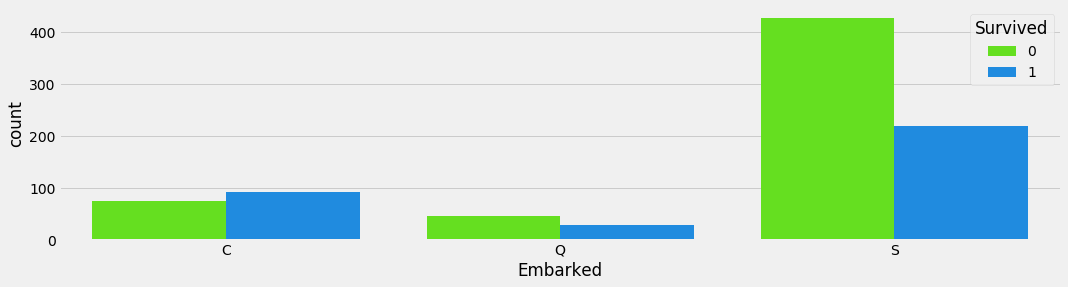

In [13]:
plt.figure(figsize=(16,4))
sns.countplot(data=train,x='Embarked',hue='Survived',palette='gist_rainbow')

In [14]:
train[['Age','Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,28.566970,32.204208
std,13.199572,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,24.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


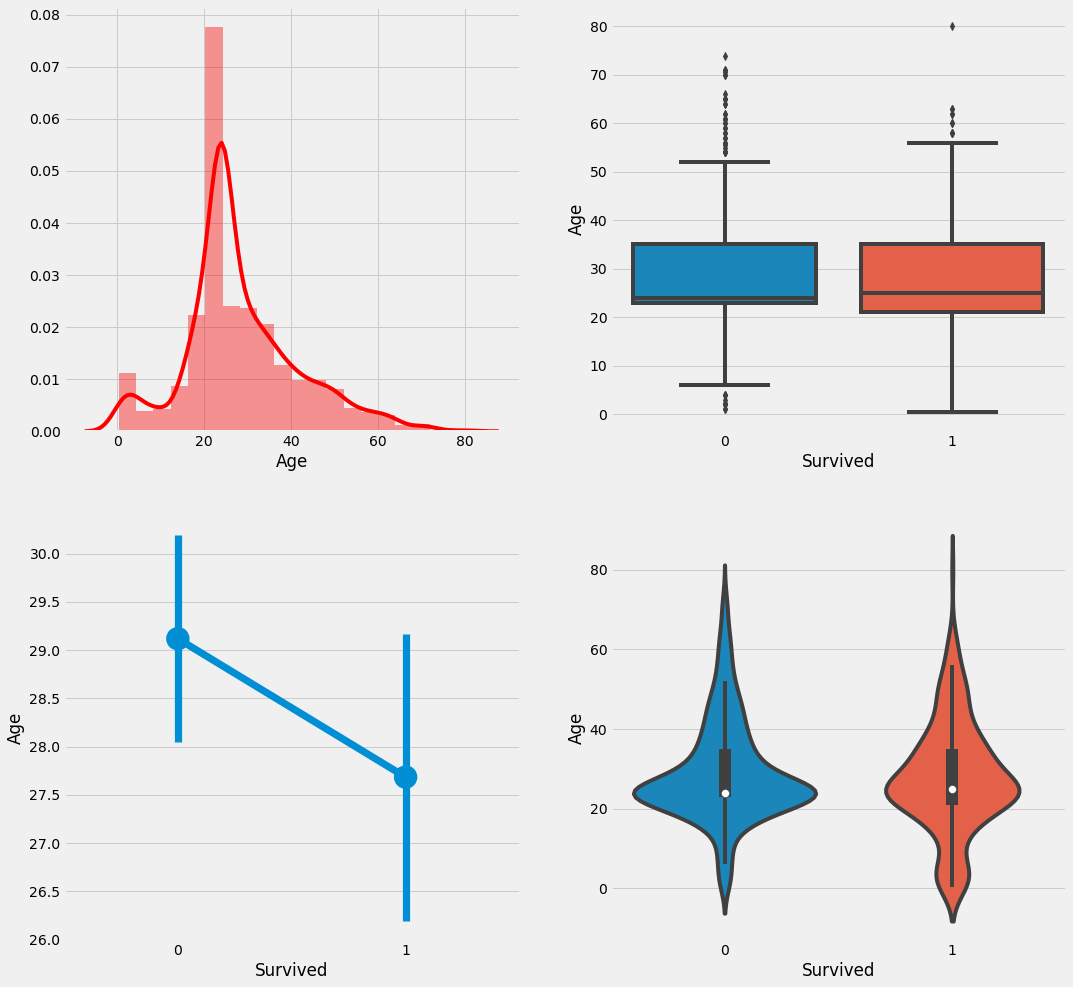

In [15]:
fig,ax = plt.subplots(2,2,figsize=(16,16))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['Age'],bins=20,color='r',ax=ax1)
sns.boxplot(y='Age',x='Survived',data=train,ax=ax2)
sns.pointplot(y='Age',x='Survived',data=train,ax=ax3)
sns.violinplot(y='Age',x='Survived',data=train,ax=ax4)

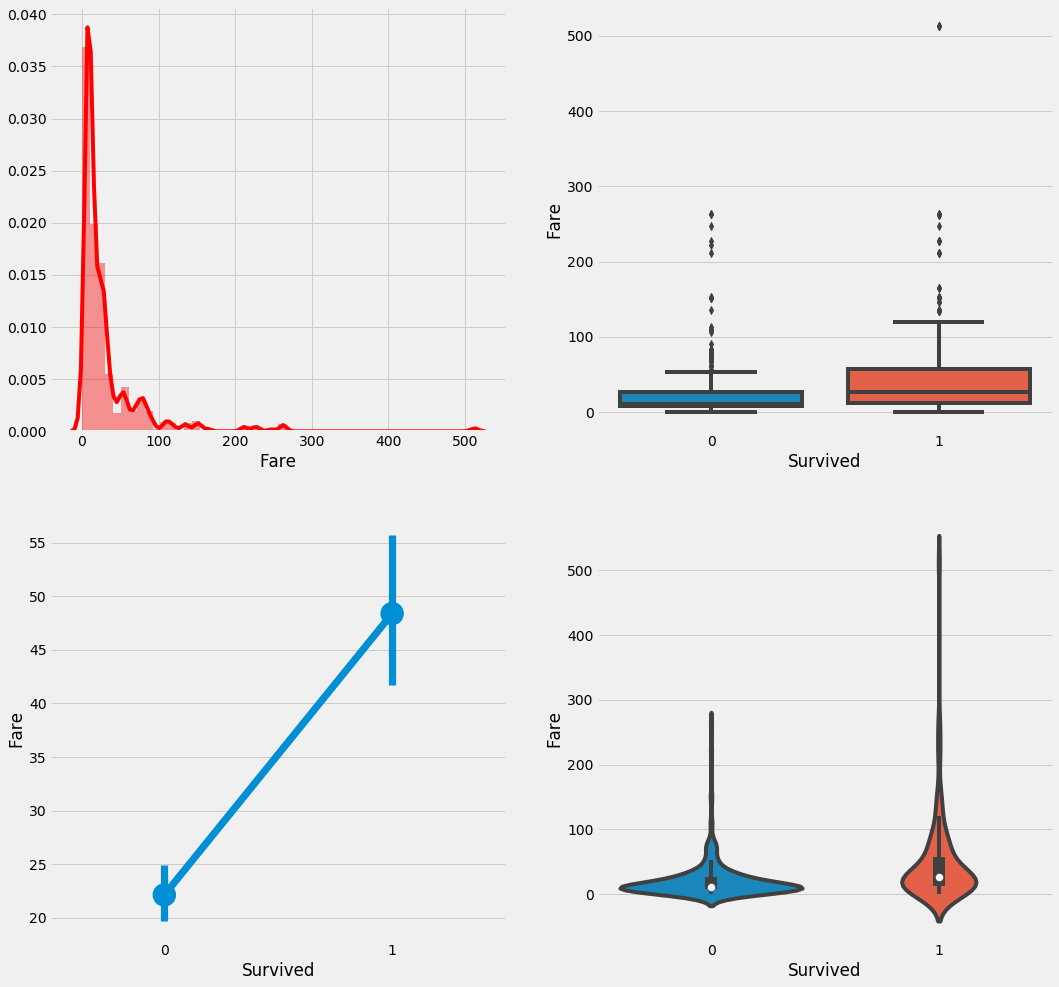

In [16]:
fig,ax = plt.subplots(2,2,figsize = (16,16))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['Fare'],bins=50,color='r',ax=ax1)
sns.boxplot(y='Fare',x='Survived',data=train,ax=ax2)
sns.pointplot(y='Fare',x='Survived',data=train,ax=ax3)
sns.violinplot(y='Fare',x='Survived',data=train,ax=ax4)

# Extract features from Name

In [17]:
corpus = [w.split() for w in train['Name']]
corpus[0:20]

[['Braund,', 'Mr.', 'Owen', 'Harris'],
 ['Cumings,', 'Mrs.', 'John', 'Bradley', '(Florence', 'Briggs', 'Thayer)'],
 ['Heikkinen,', 'Miss.', 'Laina'],
 ['Futrelle,', 'Mrs.', 'Jacques', 'Heath', '(Lily', 'May', 'Peel)'],
 ['Allen,', 'Mr.', 'William', 'Henry'],
 ['Moran,', 'Mr.', 'James'],
 ['McCarthy,', 'Mr.', 'Timothy', 'J'],
 ['Palsson,', 'Master.', 'Gosta', 'Leonard'],
 ['Johnson,', 'Mrs.', 'Oscar', 'W', '(Elisabeth', 'Vilhelmina', 'Berg)'],
 ['Nasser,', 'Mrs.', 'Nicholas', '(Adele', 'Achem)'],
 ['Sandstrom,', 'Miss.', 'Marguerite', 'Rut'],
 ['Bonnell,', 'Miss.', 'Elizabeth'],
 ['Saundercock,', 'Mr.', 'William', 'Henry'],
 ['Andersson,', 'Mr.', 'Anders', 'Johan'],
 ['Vestrom,', 'Miss.', 'Hulda', 'Amanda', 'Adolfina'],
 ['Hewlett,', 'Mrs.', '(Mary', 'D', 'Kingcome)'],
 ['Rice,', 'Master.', 'Eugene'],
 ['Williams,', 'Mr.', 'Charles', 'Eugene'],
 ['Vander', 'Planke,', 'Mrs.', 'Julius', '(Emelia', 'Maria', 'Vandemoortele)'],
 ['Masselmani,', 'Mrs.', 'Fatima']]

In [18]:
def Name_extract(df):
    k = []
    corpus = [w.split() for w in df['Name']]
    
    for i in corpus:
        if 'Mr.' in i:
            k.append('Mr.')
        elif 'Mrs.' in i:
            k.append('Mrs')
        elif 'Miss.' in i:
            k.append('Miss.')
        elif 'Master.' in i:
            k.append('Master.')
        elif 'Dr.' in i:
            k.append('Dr.')
        elif 'Capt.' in i:
            k.append('Capt.')
        elif 'Don.' in i:
            k.append('Don.')
        elif 'Col.' in i:
            k.append('Col.')
        elif 'Major.' in i:
            k.append('Major.')
        else:
            k.append('other')
    
    no_word = [len(l.split()) for l in df['Name']]
    no_char = [len(m) for m in df['Name']]
    df['name_category'],df['no_word'],df['no_char'] = k, no_word,no_char
    df['name_category'] = df['name_category'].astype('category')
    df['no_word'] = df['no_word'].astype('category')
    return df


In [19]:
train = Name_extract(train)
test = Name_extract(test)

In [20]:
train['name_category'].value_counts()

Mr.        517
Miss.      182
Mrs        125
Master.     40
other       14
Dr.          7
Major.       2
Col.         2
Don.         1
Capt.        1
Name: name_category, dtype: int64

Look thier is 1 captain, 1 Don , 2 Col , 2 Major ,7 Doctor in data set.
We have categories for all the name.

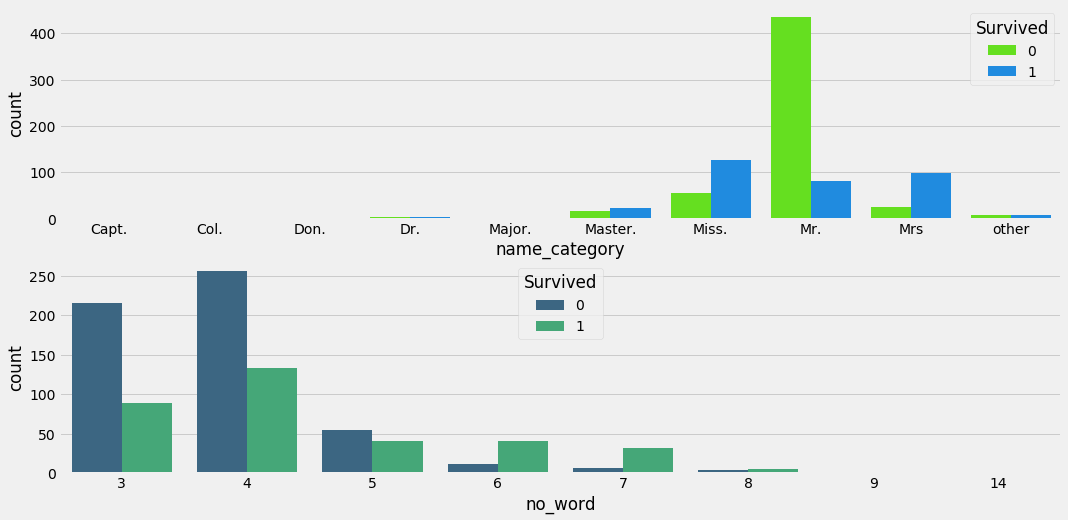

In [21]:
fig,ax = plt.subplots(2,1,figsize=(16,8))
ax1,ax2 = ax.flatten()
sns.countplot(data=train,x='name_category',hue='Survived',ax=ax1,palette='gist_rainbow')
sns.countplot(data=train,x='no_word',hue='Survived',palette='viridis',ax=ax2)

The captain of the ship did not survived

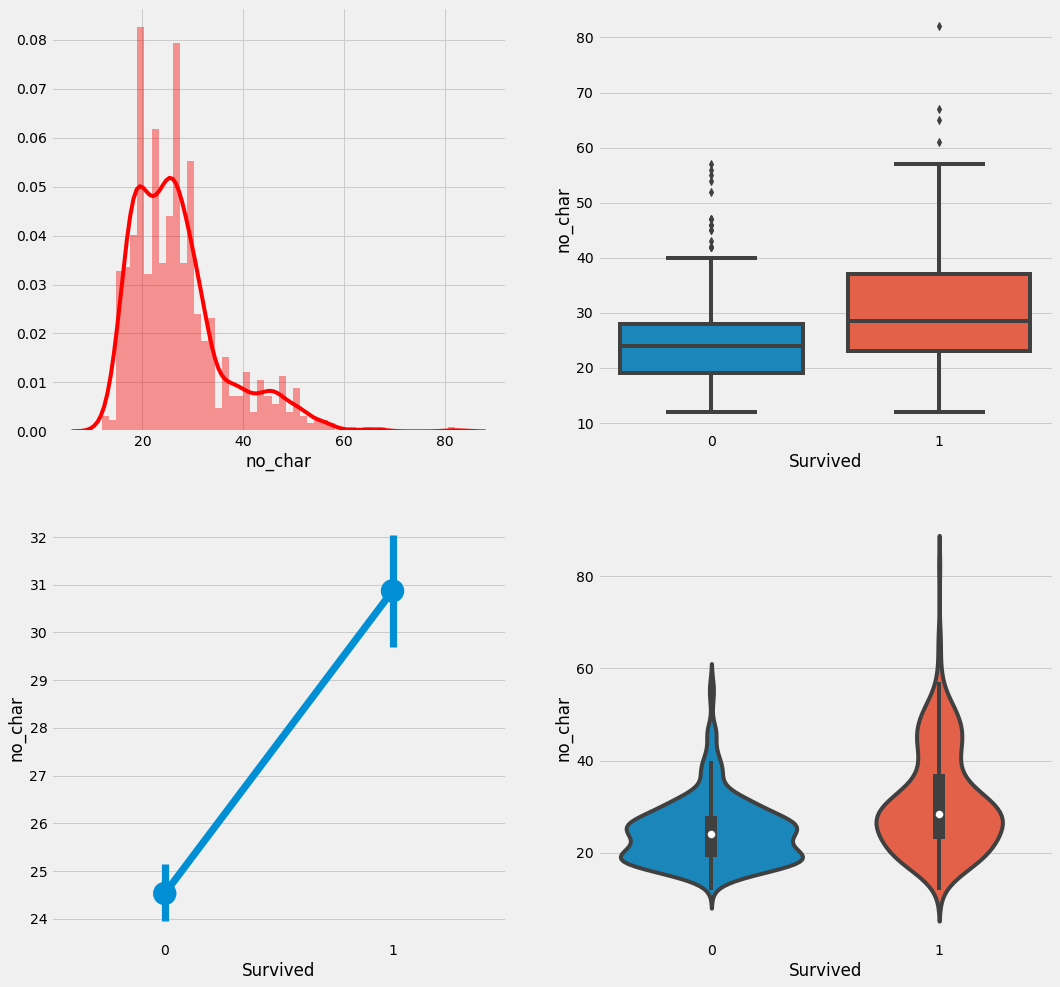

In [22]:
fig,ax = plt.subplots(2,2,figsize=(16,16))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['no_char'],bins=50,color='r',ax=ax1)
sns.boxplot(data=train,y='no_char',x='Survived',ax=ax2)
sns.pointplot(data=train,y='no_char',x='Survived',ax=ax3)
sns.violinplot(data=train,y='no_char',x='Survived',ax=ax4)

# Extract feature in Cabin variable

In [23]:
def extract_cabin(df):  
    no_cabin = [len(w.split()) for w in df['Cabin']]
    df['no_cabin'] = no_cabin
    df['no_cabin'] = df['no_cabin'].astype('category')

extract_cabin(train)
extract_cabin(test)

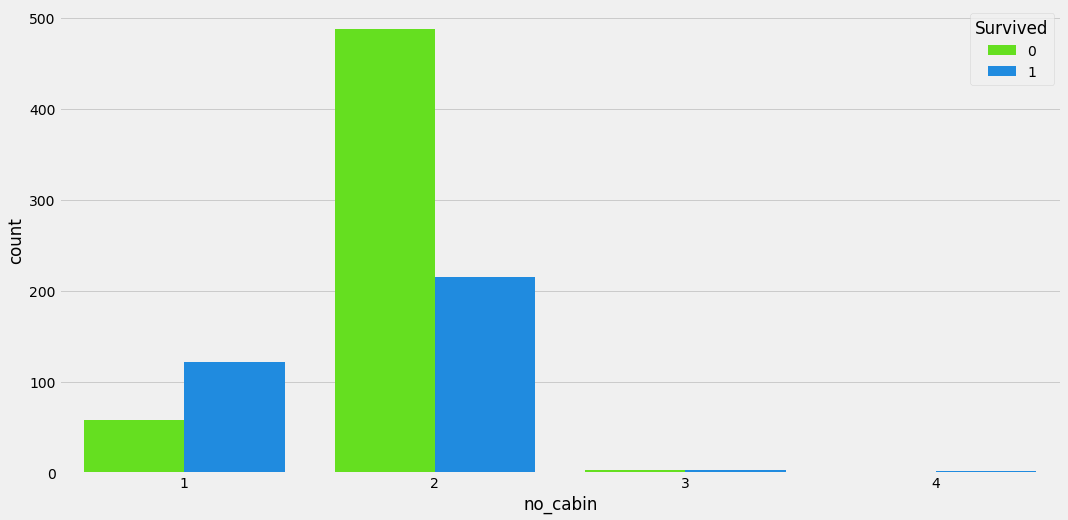

In [24]:
plt.figure(figsize=(16,8))
sns.countplot(data=train,x='no_cabin',hue='Survived',palette='gist_rainbow')

# Co relation plot

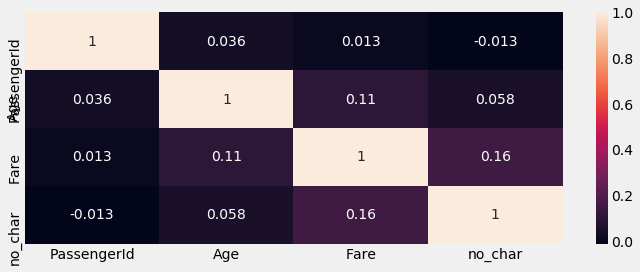

In [25]:
cor = train.corr()
plt.figure(figsize=(10,4))
sns.heatmap(cor,annot=True)
plt.tight_layout()

# Determine outliers in dataset

In [26]:
def outlier(df,columns):
    for i in columns:
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l
num_col = ['Fare','Age','no_char']       
outlier(train,num_col)
outlier(test,num_col)

Fare -26.724 65.6344 0.0 249.00622
Age

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


 2.5 54.5 1.0 65.0
no_char 5.0 45.0 15.0 55.1
Fare -27.4683125 66.8359875 6.447411 262.375
Age -1.125 57.875 0.9336 63.83
no_char 3.875 46.875 15.0 58.83


# One Hot Encoding

In [27]:
def OHE(df1,df2):
    #cat_col = column

    len_df1 = df1.shape[0]
    
    df = pd.concat([df1,df2],ignore_index=True)
    cat_col = df1.select_dtypes(include =['category']).columns
    c2,c3 = [],{}
    
    print('Categorical feature',len(cat_col))
    for c in cat_col:
        if df[c].nunique()>2 :
            c2.append(c)
            c3[c] = 'ohe_'+c
    
    df = pd.get_dummies(df, prefix=c3, columns=c2,drop_first=True)

    df1 = df.loc[:len_df1-1]
    df2 = df.loc[len_df1:]
    print('Train',df1.shape)
    print('Test',df2.shape)
    return df1,df2

In [28]:
train1,test1 = OHE(train,test)

Categorical feature 9
Train (891, 45)
Test (418, 45)


# Encoder 

In [29]:
le = LabelEncoder()
#col =['Sex']
train1['Sex'] = le.fit_transform(train1['Sex'])
test1['Sex'] = le.fit_transform(test1['Sex'])


In [30]:
train1.head().T

,0,1,2,3,4
Age,22,38,26,35,35
Cabin,B96 B98,C85,B96 B98,C123,B96 B98
Fare,7.25,249.006,7.925,53.1,8.05
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
PassengerId,1,2,3,4,5
Sex,1,0,0,0,1
Survived,0,1,1,1,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
no_char,23,55.1,22,44,24
ohe_Pclass_2,0,0,0,0,0


# Split data set

In [31]:
train1.columns

Index(['Age', 'Cabin', 'Fare', 'Name', 'PassengerId', 'Sex', 'Survived',
       'Ticket', 'no_char', 'ohe_Pclass_2', 'ohe_Pclass_3', 'ohe_SibSp_1',
       'ohe_SibSp_2', 'ohe_SibSp_3', 'ohe_SibSp_4', 'ohe_SibSp_5',
       'ohe_SibSp_8', 'ohe_Parch_1', 'ohe_Parch_2', 'ohe_Parch_3',
       'ohe_Parch_4', 'ohe_Parch_5', 'ohe_Parch_6', 'ohe_Parch_9',
       'ohe_Embarked_Q', 'ohe_Embarked_S', 'ohe_name_category_Col.',
       'ohe_name_category_Don.', 'ohe_name_category_Dr.',
       'ohe_name_category_Major.', 'ohe_name_category_Master.',
       'ohe_name_category_Miss.', 'ohe_name_category_Mr.',
       'ohe_name_category_Mrs', 'ohe_name_category_other', 'ohe_no_word_4',
       'ohe_no_word_5', 'ohe_no_word_6', 'ohe_no_word_7', 'ohe_no_word_8',
       'ohe_no_word_9', 'ohe_no_word_14', 'ohe_no_cabin_2', 'ohe_no_cabin_3',
       'ohe_no_cabin_4'],
      dtype='object')

In [32]:
unwanted = ['PassengerId','Survived','Name','Cabin','Ticket']
X = train1.drop(unwanted,axis=1)
y = train1['Survived'].astype('category')
x_test = test1.drop(unwanted,axis=1)
#del train1,test1

# Hyperparameter tuning

In [33]:
#Grid Search
logreg = LogisticRegression(class_weight='balanced')
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=10)
clf.fit(X,y)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

Best roc_auc: 0.8616, with best C: {'C': 1}


# Logistic Regression model
Logistic regression is used for modelling. The data set is split using Stratified Kfold. In each split model is created and predicted using that model. The final predicted value is average of all model. 

In [34]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = LogisticRegression(C=2)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(x_test)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 5
ROC AUC score: 0.835902503294
2 of KFold 5
ROC AUC score: 0.783201581028
3 of KFold 5
ROC AUC score: 0.81243315508
4 of KFold 5
ROC AUC score: 0.809625668449
5 of KFold 5
ROC AUC score: 0.773070696168


In [35]:
print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Confusion matrix
 [[98 11]
 [24 44]]
Cv [0.83590250329380766, 0.7832015810276679, 0.81243315508021385, 0.80962566844919781, 0.77307069616837554] 
Mean cv Score 0.802846720804


In [36]:
lr.coef_

array([[ -2.39012485e-02,   1.41614253e-04,  -1.45726888e+00,
          4.38403602e-02,  -3.76671926e-01,  -1.53181471e+00,
         -4.14293685e-01,  -5.42191388e-02,  -1.45198158e+00,
         -1.80112074e+00,  -1.45947789e+00,  -1.06775898e+00,
         -3.27991605e-01,  -9.51320688e-01,  -1.01019839e-02,
         -1.61278026e+00,  -8.22792121e-01,   0.00000000e+00,
          0.00000000e+00,   5.35637141e-04,  -5.12964410e-01,
          2.12977184e-01,   0.00000000e+00,  -2.52218986e-01,
         -1.34904771e-01,   2.14731118e+00,   6.55473688e-01,
         -6.52108849e-01,   8.18635874e-01,  -2.08673104e-01,
         -1.47205313e-01,  -1.77527134e-01,   1.89554187e-03,
          2.59822763e-01,  -1.30113521e+00,   7.68383820e-02,
          1.82415671e-02,  -8.28536051e-01,   2.06722632e-01,
          1.39538322e-01]])

In [37]:
lr.score(xvl,yvl)

0.80225988700564976

# Reciever Operating Characteristics

Text(0.5,0,'False positive rate')

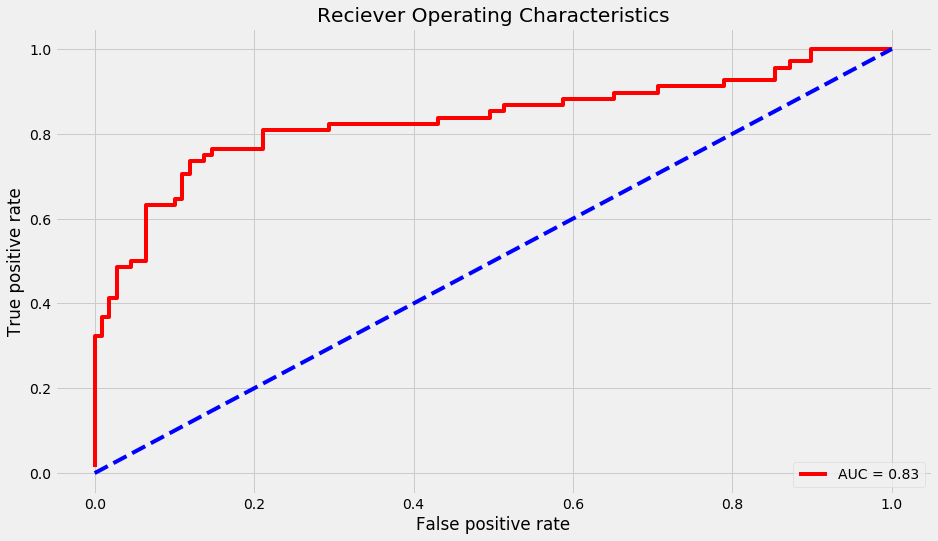

In [38]:
proba = lr.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

# Predict for unsen data set

In [39]:
y_pred = pred_test_full/5
submit = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_pred})
submit['Survived'] = submit['Survived'].apply(lambda x: 1 if x>0.5 else 0)
#submit.to_csv('lr_titanic.csv.gz',index=False,compression='gzip') 
submit.to_csv('lr_titanic.csv',index=False) 

In [40]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Thank you for visiting